In [1]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pylab
from Bio import SeqIO
from Bio import Phylo
import pandas as pd
import seaborn as sns
mpl.rcParams['pdf.fonttype'] = 42
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
def checkSlash(directory):
    if directory[-1] != '/':
        directory = directory + '/'
    return directory

def importMapping(inFile):
    mapping = {}
    with open(inFile, 'r') as f:
        for line in f:
            if '#' == line[0]:
                continue
            line = line.strip().split('\t')
            mapping[line[0]] = line[2]
    return mapping

def editNexus(inFile, outFile):
    outF = open(outFile, 'w')
    with open(inFile, 'r') as f:
        for line in f:
            if 'color=' in line:
                line = line.split('[')[0] + '\n'
            elif line == 'end\n':
                line = 'end;'
            elif ';end;' in line:
                line = line.replace(';end;', ';\nend;')
            elif 'figtree' in line:
                break
            outF.write(line)
    outF.close()

In [3]:
oldPath = '/Users/sarahspencer/Dropbox/2017_05_Pseudo_Spence/subgroupB/tree_counting/'
newPath = 'subgroupB/'
if not os.path.exists(newPath):
    os.makedirs(newPath)
treeFile = '1_2_177683.tree'
outTree = newPath + treeFile
editNexus(oldPath + treeFile, outTree)

#Edit to export newick format for ete toolkit
outNewick = outTree.replace('.tree', '.nhx')
Phylo.convert(outTree, 'nexus', outNewick, 'newick')
mapping = importMapping('map_v2.txt')

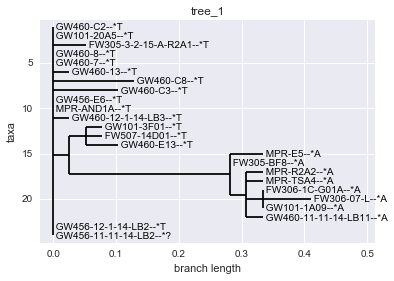

In [15]:
tree = Phylo.read(outTree, 'nexus')

for t in tree.get_terminals():
    t.name = t.name.replace(t.name.split('--')[0], mapping[t.name.split('--')[0]])
    #t.name = t.name.replace()

Phylo.draw(tree)

In [ ]:
#clade.color = branch color
#tree.root_at_midpoint()